In [63]:
import pandas as pd
import numpy as np

In [64]:
wiki = pd.read_csv('wiki_raw.csv')
kaggle = pd.read_csv('kaggle_raw.csv')
new_essay = pd.read_excel('new_essay_data.xlsx')

In [65]:
# Create a new DataFrame to store concatenated data
wiki_data = pd.DataFrame(columns=['text', 'label'])
# Fill 'text' column with 'wiki_intro' and 'generated_intro' content concatenated
wiki_data['text'] = pd.concat([wiki['wiki_intro'], wiki['generated_intro']], ignore_index=True)
# Fill 'label' column with 0 for 'wiki_intro' and 1 for 'generated_intro'
wiki_data['label'] = np.concatenate((np.zeros(len(wiki['wiki_intro'])), np.ones(len(wiki['generated_intro']))))
# check if there're missing values in the dataset
print(wiki_data.isnull().sum())

text     0
label    0
dtype: int64


In [66]:
kaggle.rename(columns={'generated': 'label'}, inplace=True)

## Data Preprocessing

In [67]:
# Data Preprocessing
#!pip install --upgrade pip
#!pip install transformers
#!pip install ftfy
#!pip install ax-platform

In [68]:
# processing
import numpy as np
import pandas as pd
# text
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from ftfy import fix_text
#nltk.download('stopwords')
#nltk.download('punkt')

In [69]:
def data_preprocessing(df):
    # Remove rows with any missing values
    df = df.dropna()
    # Drop duplicates where both 'text' and 'label' are the same
    df = df.drop_duplicates(subset=['text', 'label'])
    # Drop all entries where 'text' appears more than once (across different labels)
    df = df.drop_duplicates(subset='text', keep=False)
    return df


In [70]:
#prepare train data
kaggle = data_preprocessing(kaggle)
wiki_data = data_preprocessing(wiki_data)
new_essay = data_preprocessing(new_essay)

## EDA

In [71]:
# Check for Data Balance
kaggle['label'].value_counts()

0    16122
1    11218
Name: label, dtype: int64

In [72]:
wiki_data['label'].value_counts()

0.0    150000
1.0    150000
Name: label, dtype: int64

In [73]:
new_essay['label'].value_counts()

0    50
1    50
Name: label, dtype: int64

In [74]:
kaggle_eda = kaggle.copy()
wiki_eda= wiki_data.copy()
new_essay_eda= new_essay.copy()

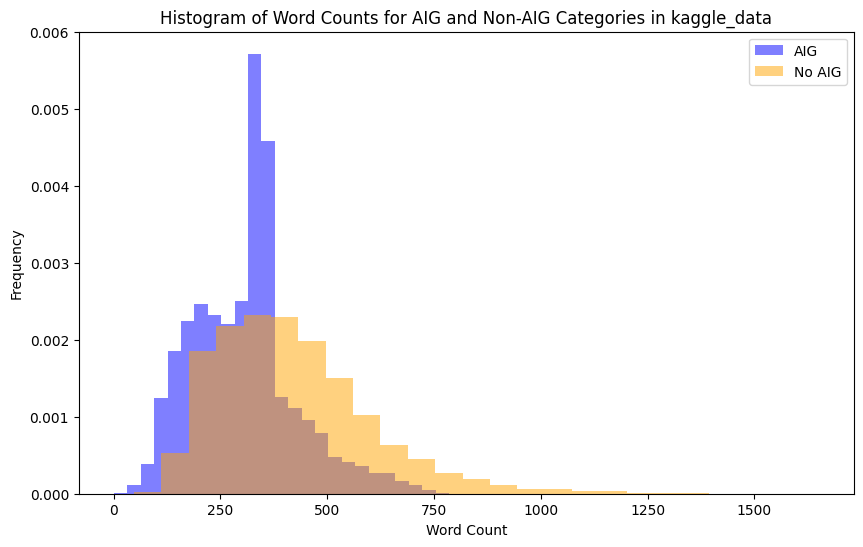

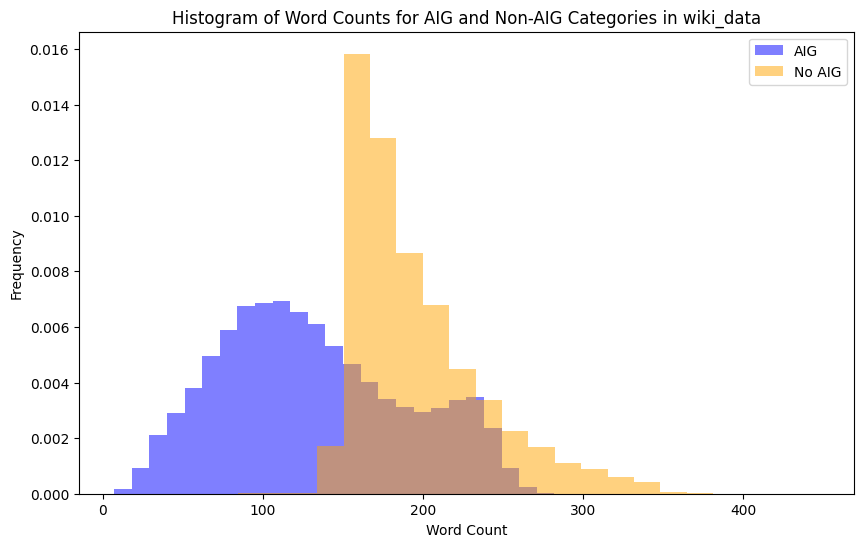

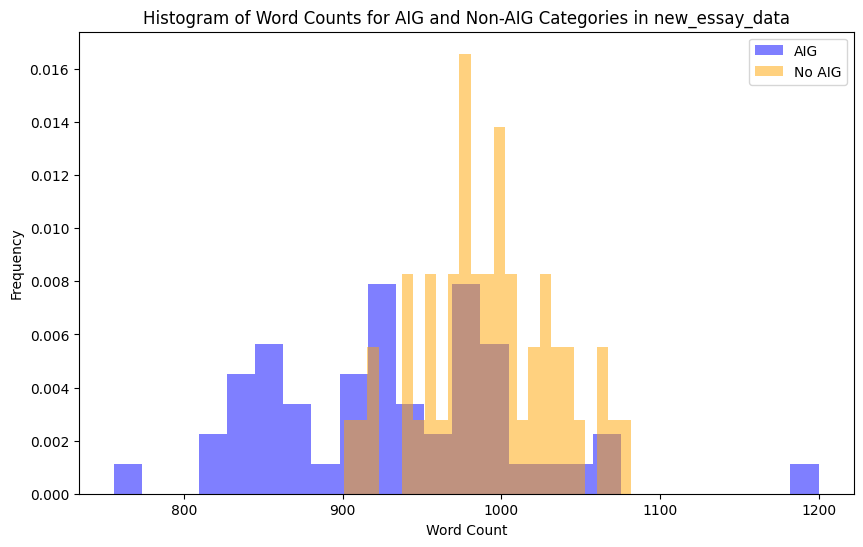

In [75]:
import matplotlib.pyplot as plt

def his_word_count (df, df_name):
    # Calculate word count for each row
    df['Word_Count'] = df['text'].apply(lambda x: len(str(x).lower().split()))

    # Separate data for AIG and non-AIG categories
    aig_word_counts = df[df['label'] == 1]['Word_Count']
    no_aig_word_counts = df[df['label'] == 0]['Word_Count']

    # Plotting histograms
    plt.figure(figsize=(10, 6))

    # Plot histogram for AIG word counts
    plt.hist(aig_word_counts, bins=25, color='blue', alpha=0.5, label='AIG', density=True)

    # Plot histogram for non-AIG word counts
    plt.hist(no_aig_word_counts, bins=25, color='orange', alpha=0.5, label='No AIG', density=True)

    # Customize plot
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Word Counts for AIG and Non-AIG Categories in {df_name}')
    plt.legend()

    # Show plot
    plt.show()

his_word_count(kaggle_eda, 'kaggle_data')
his_word_count(wiki_eda, 'wiki_data')
his_word_count(new_essay_eda, 'new_essay_data')


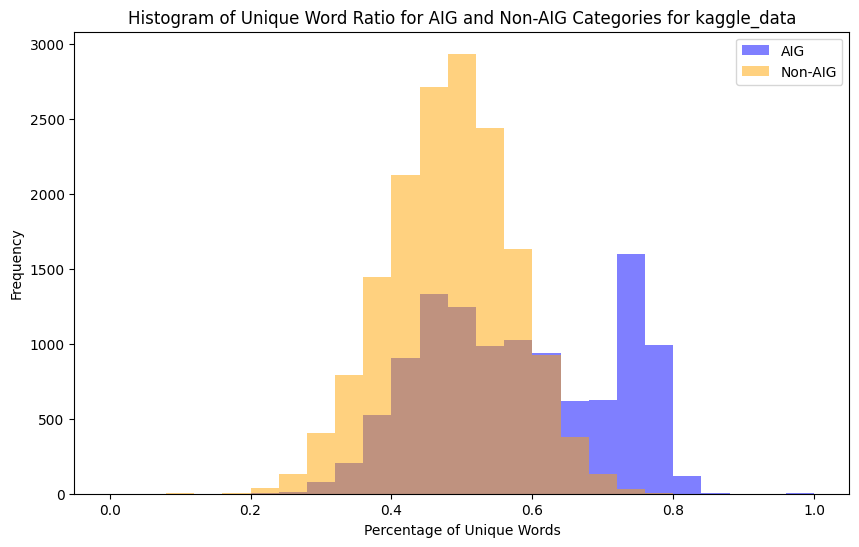

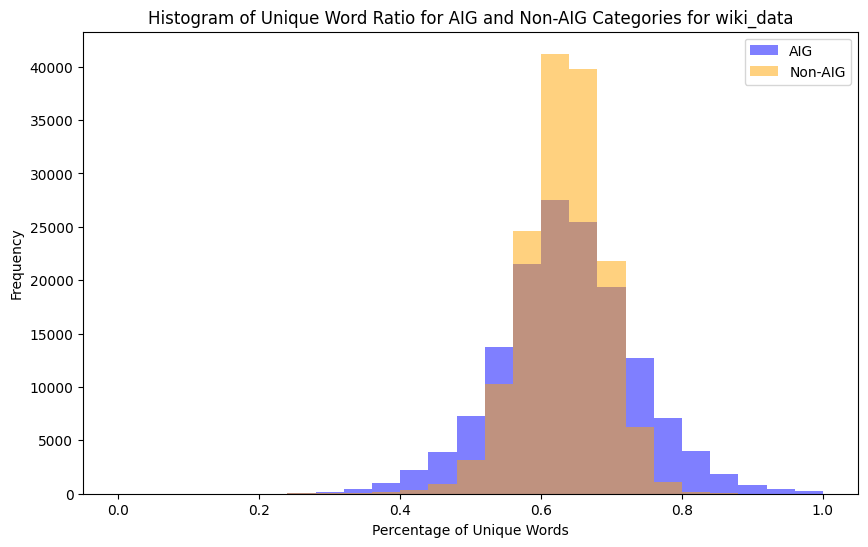

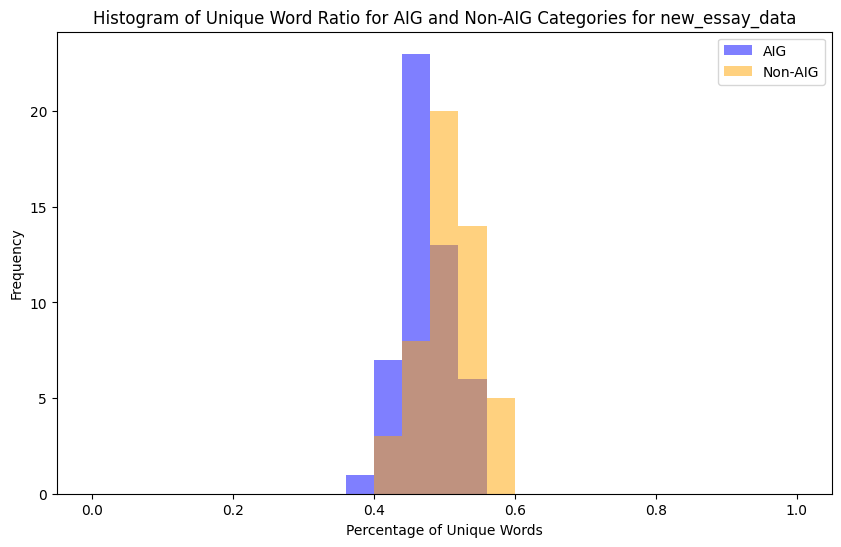

In [76]:
def his_unique_word_percent (df,df_name):    
    # Calculate unique word count for each row
    df['Unique_Word'] = df['text'].apply(lambda x: len(set(str(x).lower().split())))
    # Calculate unique word ratio for each row
    df['Unique_Word_Ratio'] = df['Unique_Word'] / df['Word_Count']

    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['Unique_Word_Ratio']
    non_aig_data = df[df['label'] == 0]['Unique_Word_Ratio']

    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=25, color='blue', range=(0,1), alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=25, color='orange', range=(0,1),alpha=0.5, label='Non-AIG')
    plt.xlabel('Percentage of Unique Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Unique Word Ratio for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

his_unique_word_percent(kaggle_eda, 'kaggle_data')
his_unique_word_percent(wiki_eda, 'wiki_data')
his_unique_word_percent(new_essay_eda, 'new_essay_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fangz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


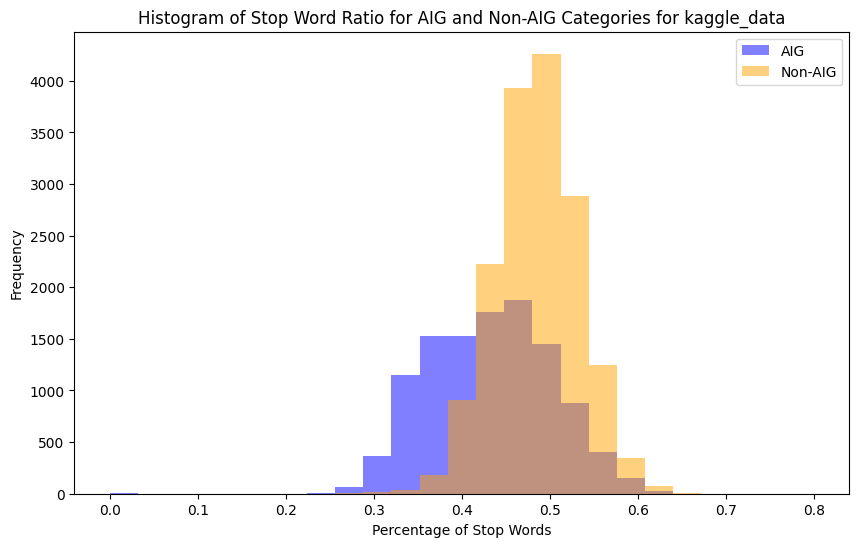

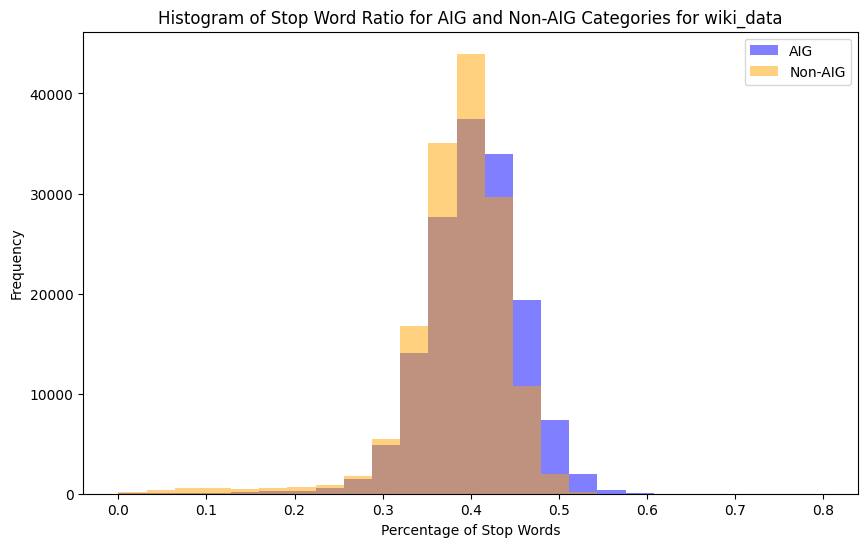

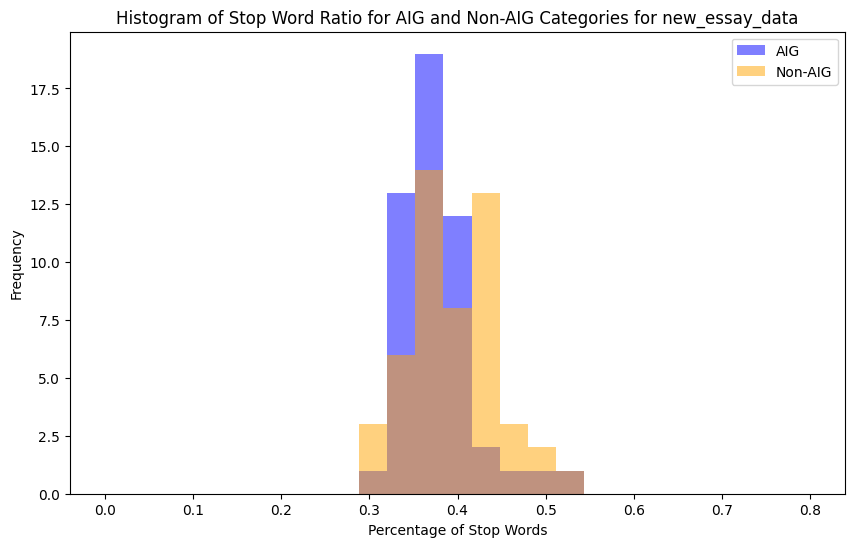

In [77]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
def his_stop_word_percent (df,df_name):
    stopword = set(stopwords.words('english'))    
    # Calculate unique word count for each row
    df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopword]))
    # Calculate unique word ratio for each row
    df['stop_word_percent'] = df['stop_word_count'] / df['Word_Count']

    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['stop_word_percent']
    non_aig_data = df[df['label'] == 0]['stop_word_percent']

    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=25, color='blue', range=(0,0.8), alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=25, color='orange', range=(0,0.8),alpha=0.5, label='Non-AIG')
    plt.xlabel('Percentage of Stop Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Stop Word Ratio for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

his_stop_word_percent(kaggle_eda, 'kaggle_data')
his_stop_word_percent(wiki_eda, 'wiki_data')
his_stop_word_percent(new_essay_eda, 'new_essay_data')

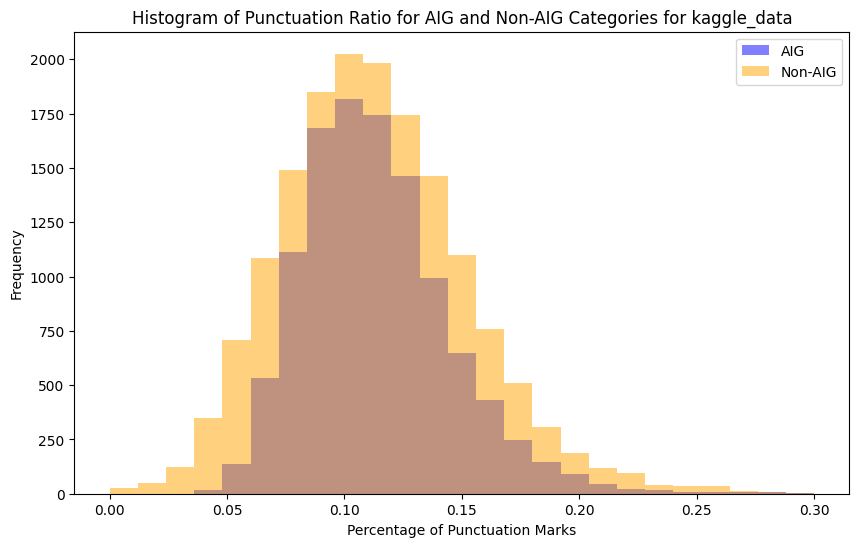

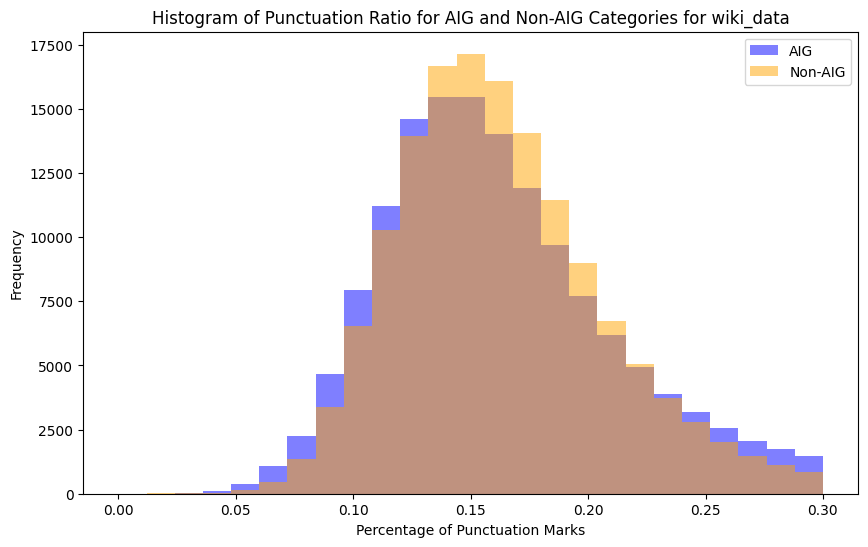

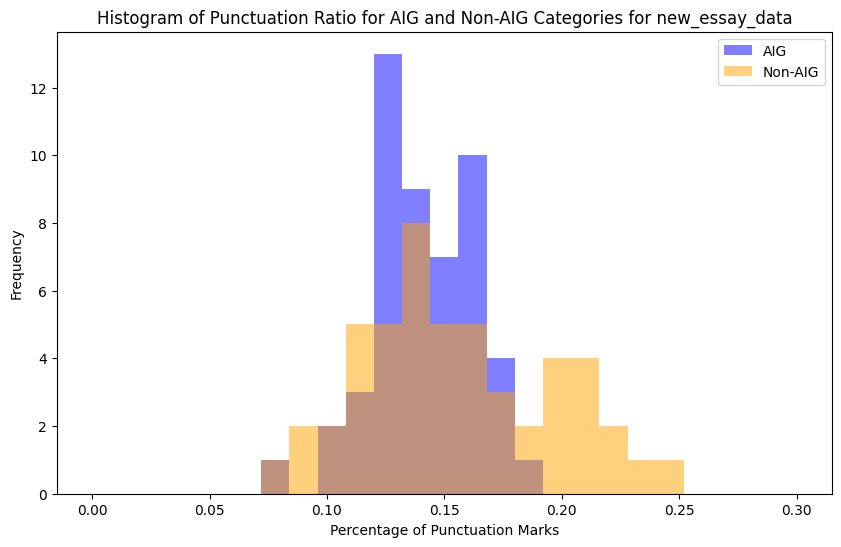

In [78]:
import string

def his_punctuation_percent(df, df_name):
    # Define punctuation marks
    punctuation_marks = set(string.punctuation)
    df['punctuation_count'] = df['text'].apply(lambda x: len([char for char in str(x) if char in punctuation_marks]))
    df['punctuation_percent'] = df['punctuation_count'] / df['Word_Count']
    aig_data = df[df['label'] == 1]['punctuation_percent']
    non_aig_data = df[df['label'] == 0]['punctuation_percent']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=25, color='blue', range=(0, 0.3), alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=25, color='orange', range=(0, 0.3), alpha=0.5, label='Non-AIG')
    plt.xlabel('Percentage of Punctuation Marks')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Punctuation Ratio for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_punctuation_percent(kaggle_eda, 'kaggle_data')
his_punctuation_percent(wiki_eda, 'wiki_data')
his_punctuation_percent(new_essay_eda, 'new_essay_data')

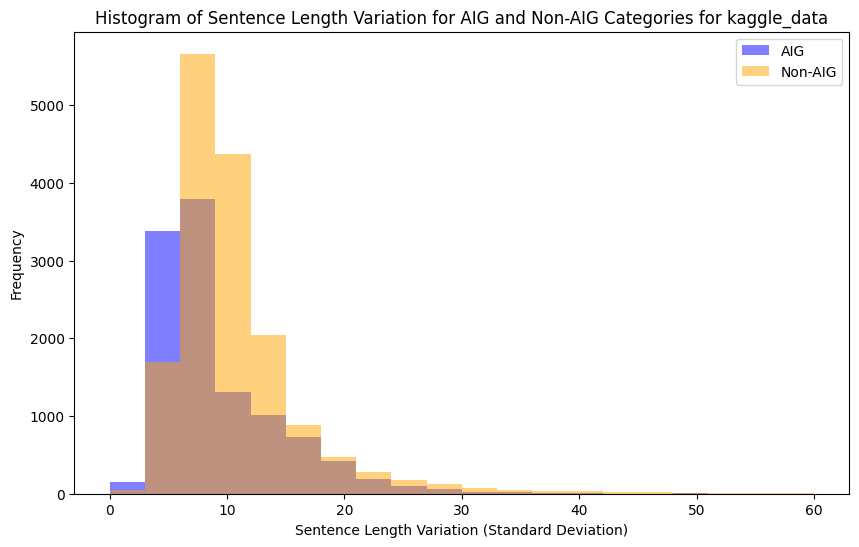

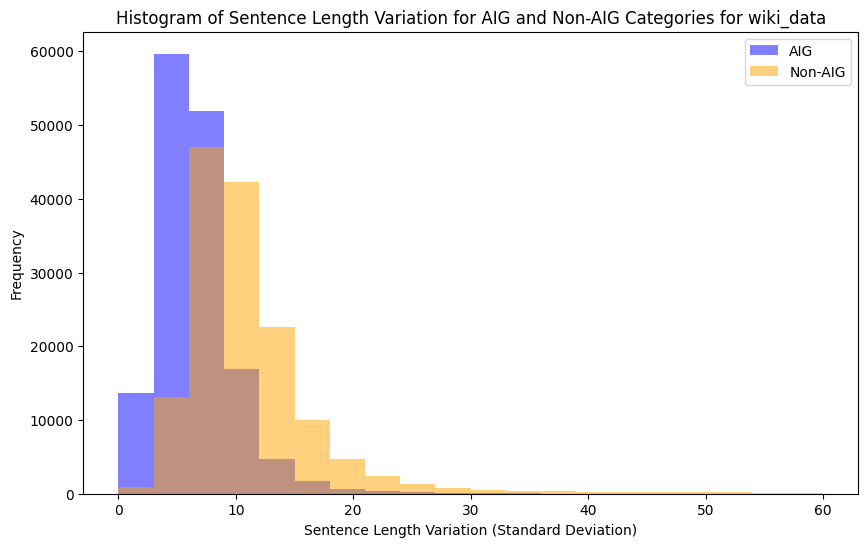

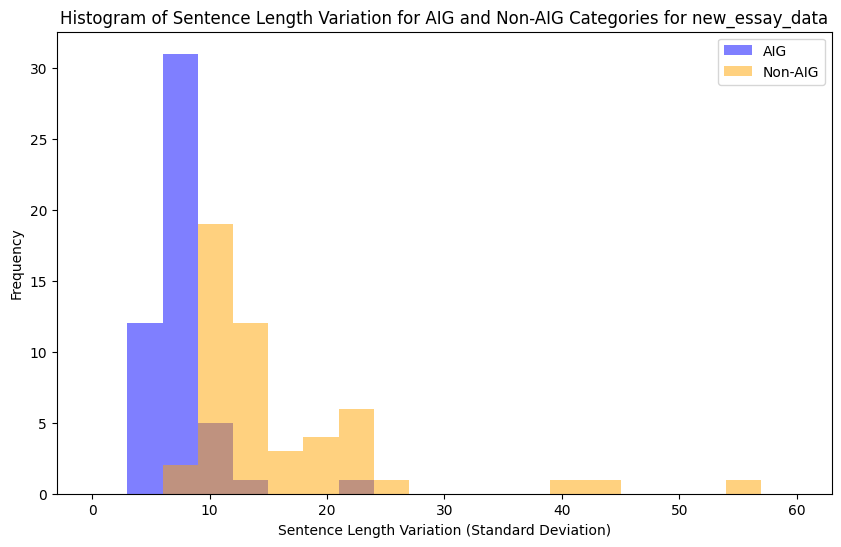

In [79]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import matplotlib.pyplot as plt

def sentence_length_variation(text):
    sentences = sent_tokenize(text)
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    variation = np.std(sentence_lengths)
    return variation

def plot_sentence_variation_histogram(df, df_name):
    # Calculate sentence variation for each row in the DataFrame
    df['sentence_variation'] = df['text'].apply(sentence_length_variation)
    
    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['sentence_variation']
    non_aig_data = df[df['label'] == 0]['sentence_variation']
    
    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=20, range=(0,60),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=20, range=(0,60), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Sentence Length Variation (Standard Deviation)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Sentence Length Variation for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

# Plot sentence variation histograms for different datasets
plot_sentence_variation_histogram(kaggle_eda, 'kaggle_data')
plot_sentence_variation_histogram(wiki_eda, 'wiki_data')
plot_sentence_variation_histogram(new_essay_eda, 'new_essay_data')


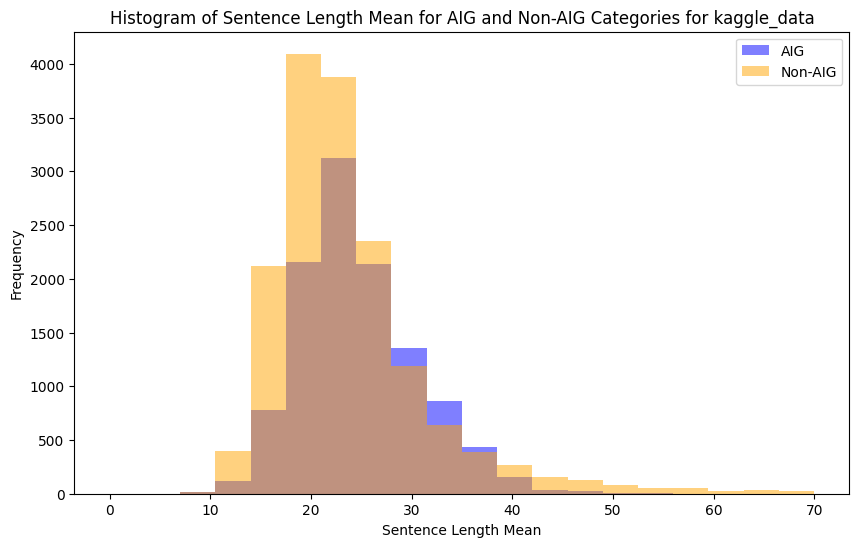

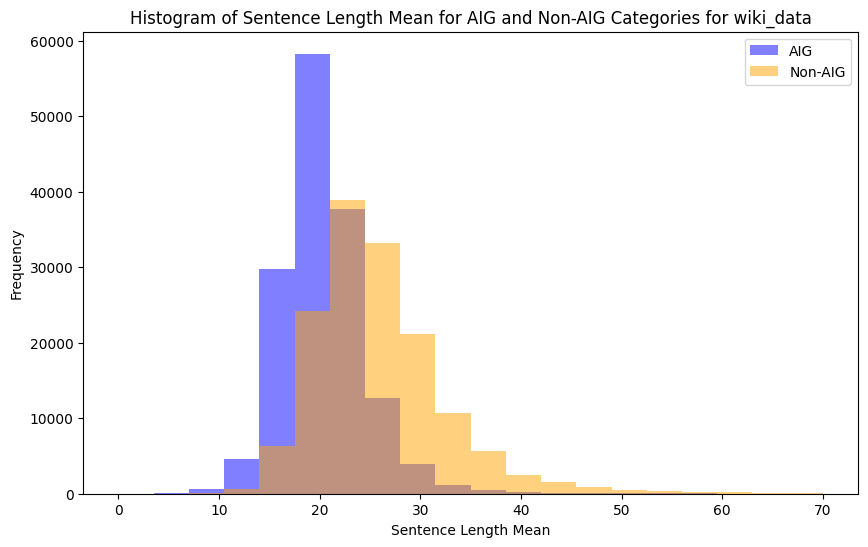

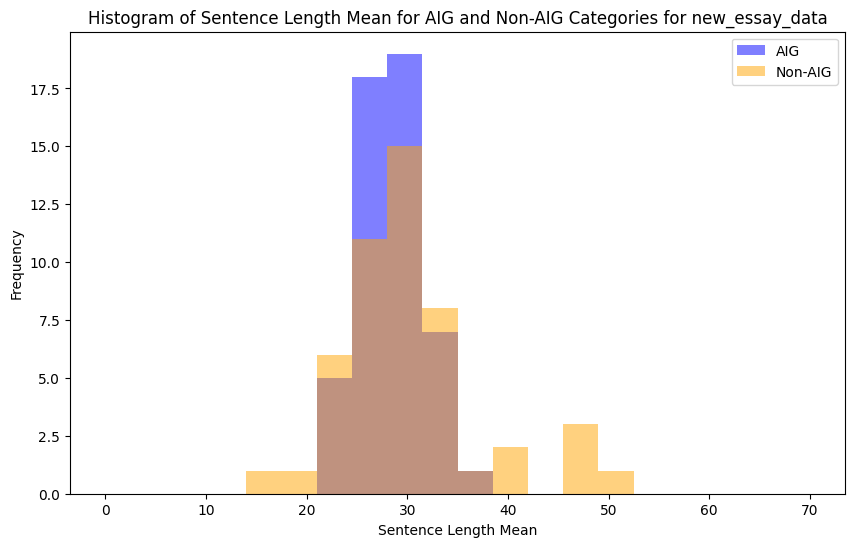

In [80]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import matplotlib.pyplot as plt

def sentence_length_mean(text):
    sentences = sent_tokenize(text)
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    mean = np.mean(sentence_lengths)
    return mean

def plot_sentence_mean_histogram(df, df_name):
    # Calculate sentence variation for each row in the DataFrame
    df['sentence_mean'] = df['text'].apply(sentence_length_mean)
    
    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['sentence_mean']
    non_aig_data = df[df['label'] == 0]['sentence_mean']
    
    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=20, range=(0, 70), color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=20, range=(0, 70),  color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Sentence Length Mean')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Sentence Length Mean for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

# Plot sentence variation histograms for different datasets
plot_sentence_mean_histogram(kaggle_eda, 'kaggle_data')
plot_sentence_mean_histogram(wiki_eda, 'wiki_data')
plot_sentence_mean_histogram(new_essay_eda, 'new_essay_data')

In [81]:
sorted_kaggle_eda = kaggle_eda.sort_values(by='sentence_mean', ascending=False)
sorted_kaggle_eda= sorted_kaggle_eda[sorted_kaggle_eda['sentence_mean']>100]
sorted_kaggle_eda

text  label  Word_Count  \
12407  the presidental election is to find a new lead...      0         715   
18456  Being yourself doesn't depends in how people s...      0         578   
16456  The greats benefits to work with a group\n\nTo...      0        1131   
5580   Cars have been by all means the number one way...      0        1047   
13575  if i had to choose i would change to election ...      0         504   
...                                                  ...    ...         ...   
1210   There are a lot advantages and disadvantages o...      0         667   
16221  " In this world you decide who do want to be e...      0         400   
4816   The car is one of the most important invention...      0         267   
17112  Great opportunities for students to attend to ...      0         463   
16338  I think some student take a class at home beca...      0         487   

       Unique_Word  Unique_Word_Ratio  stop_word_count  stop_word_percent  \
12407          237           0.331469              357           0.499301   
18456          190           0.328720              346           0.598616   
16456          198           0.175066              630           0.557029   
5580           352           0.336199              537           0.512894   
13575          195           0.386905              269           0.533730   
...            ...                ...              ...                ...   
1210           260           0.389805              326           0.488756   
16221          159           0.397500              212           0.530000   
4816           140           0.524345              139           0.520599   
17112          192           0.414687              250           0.539957   
16338          136           0.279261              268           0.550308   

       punctuation_count  punctuation_percent  sentence_variation  \
12407                  3             0.004196            0.000000   
18456                 43             0.074394            0.000000   
16456                 61             0.053935          253.500000   
5580                   7             0.006686          496.000000   
13575                  0             0.000000            0.000000   
...                  ...                  ...                 ...   
1210                  50             0.074963           20.097720   
16221                 12             0.030000           70.467634   
4816                  39             0.146067           57.557701   
17112                 44             0.095032           84.648922   
16338                 11             0.022587           38.154423   

       sentence_mean  
12407     717.000000  
18456     622.000000  
16456     607.500000  
5580      527.000000  
13575     504.000000  
...              ...  
1210      102.714286  
16221     101.750000  
4816      101.666667  
17112     101.400000  
16338     100.200000  

[93 rows x 11 columns]

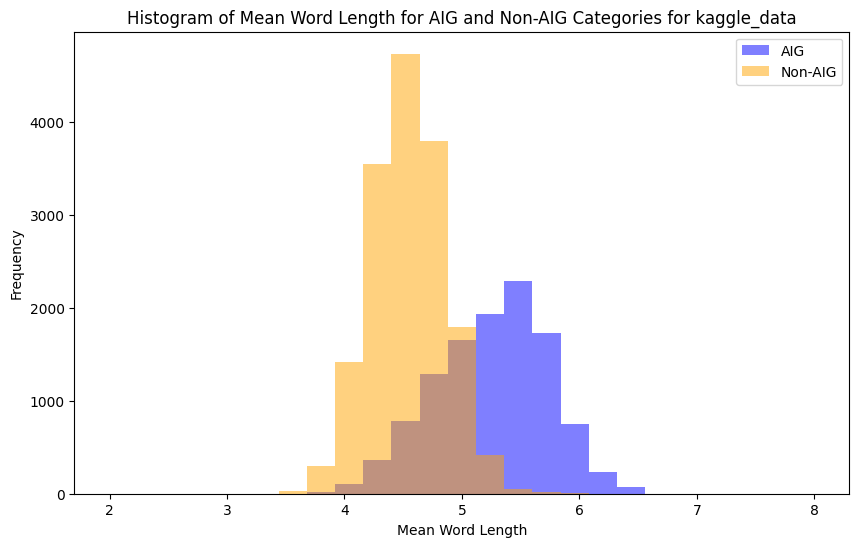

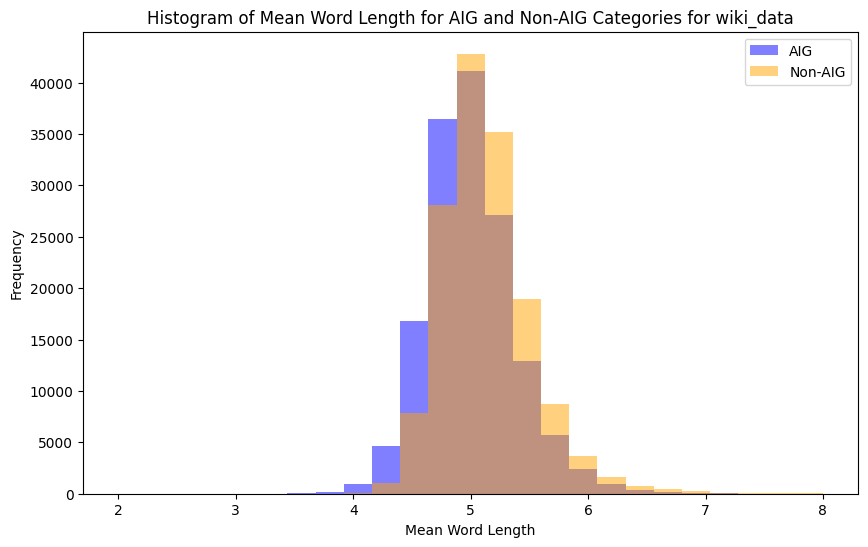

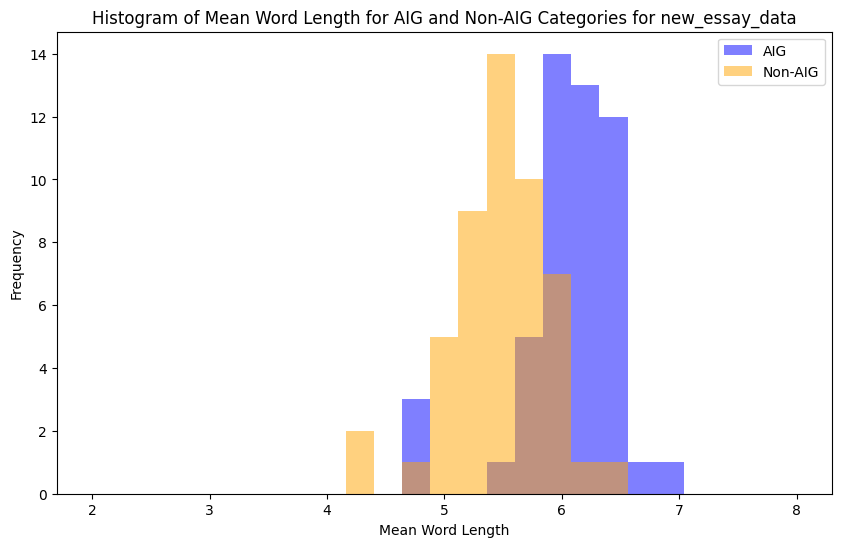

In [82]:
def his_word_length (df,df_name):
    df['word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['word_length']
    non_aig_data = df[df['label'] == 0]['word_length']

    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=25, range=(2,8),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=25, range=(2,8), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Mean Word Length')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Mean Word Length for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

his_word_length(kaggle_eda, 'kaggle_data')
his_word_length(wiki_eda, 'wiki_data')
his_word_length(new_essay_eda, 'new_essay_data')

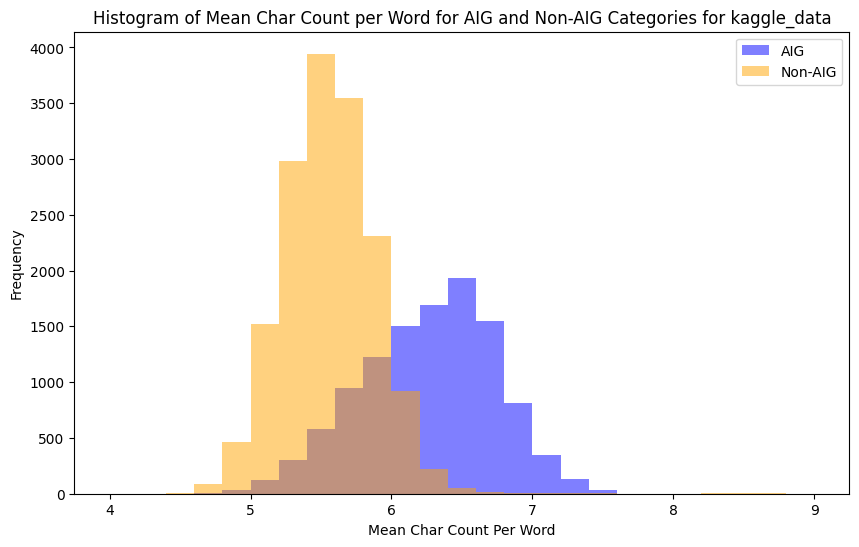

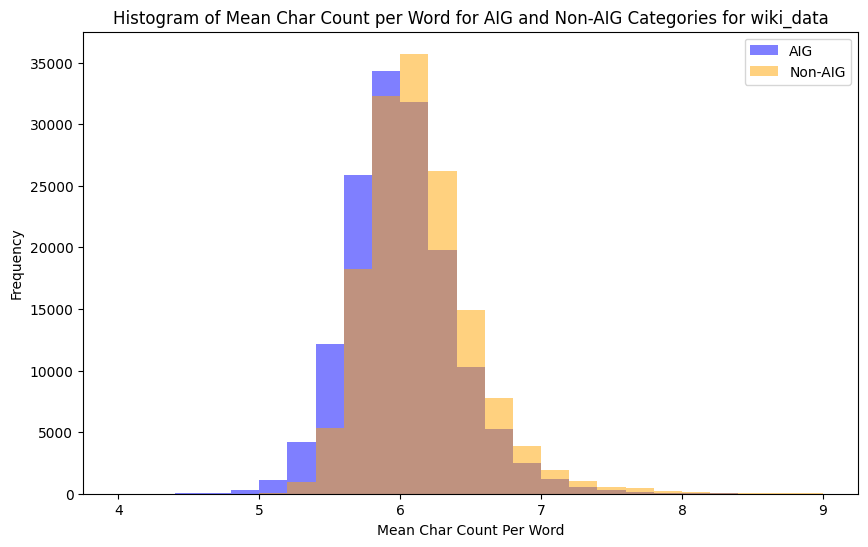

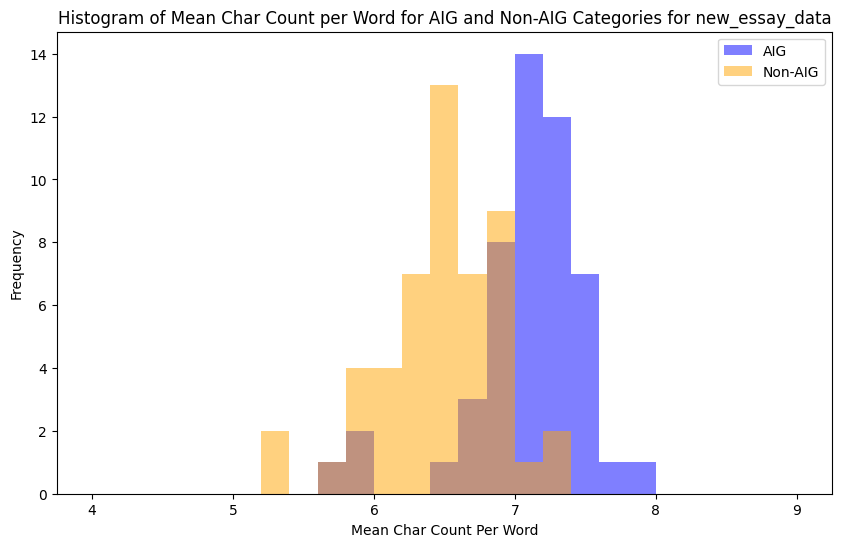

In [83]:
def his_char_length (df,df_name):
    df['char_count'] = df['text'].apply(lambda x: len(str(x)))
    df['mean_char_count_per_word']=df['char_count']/df['Word_Count']
    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['mean_char_count_per_word']
    non_aig_data = df[df['label'] == 0]['mean_char_count_per_word']

    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=25, range=(4,9),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=25, range=(4,9), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Mean Char Count Per Word')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Mean Char Count per Word for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

his_char_length(kaggle_eda, 'kaggle_data')
his_char_length(wiki_eda, 'wiki_data')
his_char_length(new_essay_eda, 'new_essay_data')

In [84]:
common_gpt_terms=['explore', 'captivate', 'tapestry', 'leverage', 'embrace', 
                'resonate', 'dynamic', 'testament', 'delve', 'elevate','remember the key',
                'involve','here are several','the social model','are some strategies',
                'this might include','sustainable practices','i can provide','as of my','here are some',
                'a complex process that','some ways in which','imagine you have a','of the latest advancements',
                'engage with your audience','can reduce the need']

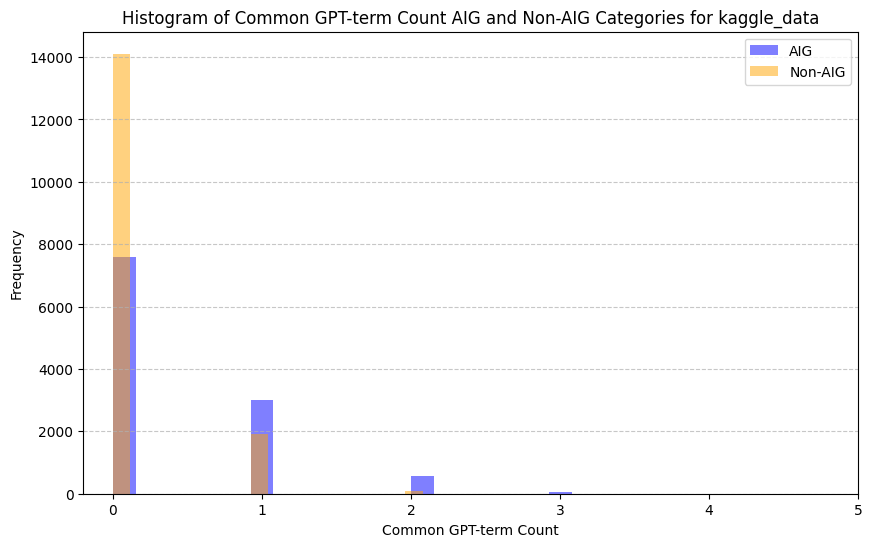

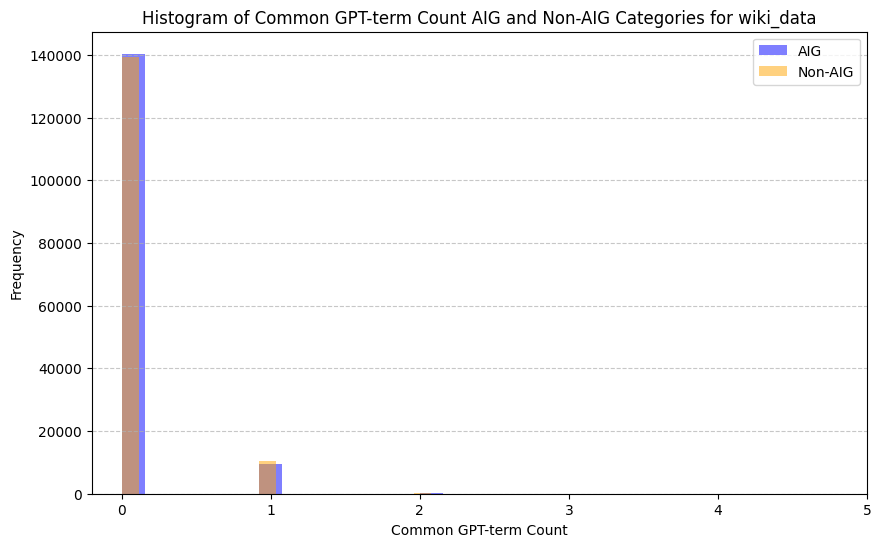

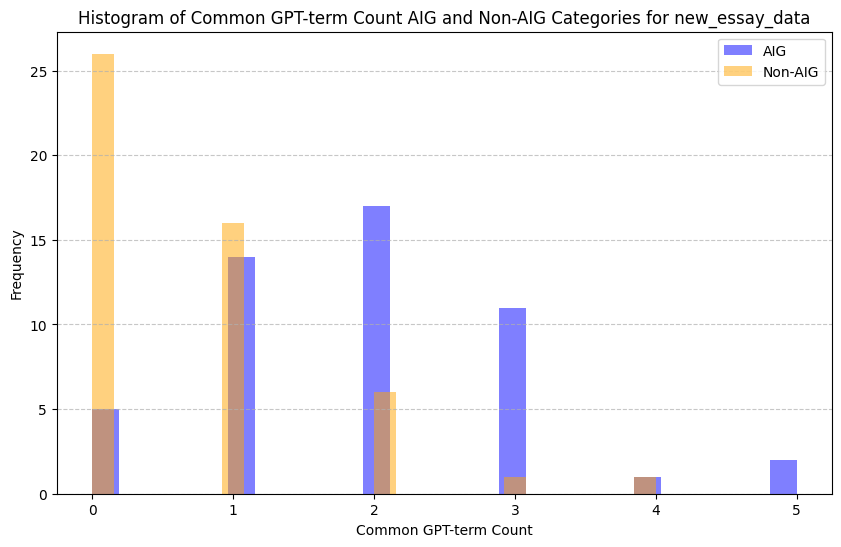

In [85]:
def his_common_gpt_term(df,df_name):
    df['gpt_word_counts'] = df['text'].apply(lambda x: sum(1 for word in common_gpt_terms if word in x.lower()))
    # Separate data for AIG and non-AIG categories
    aig_data = df[df['label'] == 1]['gpt_word_counts']
    non_aig_data = df[df['label'] == 0]['gpt_word_counts']

    # Plot histograms for AIG and non-AIG categories
    plt.figure(figsize=(10, 6))
    plt.hist(aig_data, bins=len(common_gpt_terms),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_data, bins=len(common_gpt_terms), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Common GPT-term Count')
    plt.ylabel('Frequency')
    plt.xticks(range(6))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Histogram of Common GPT-term Count AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_common_gpt_term(kaggle_eda, 'kaggle_data')
his_common_gpt_term(wiki_eda, 'wiki_data')
his_common_gpt_term(new_essay_eda, 'new_essay_data')

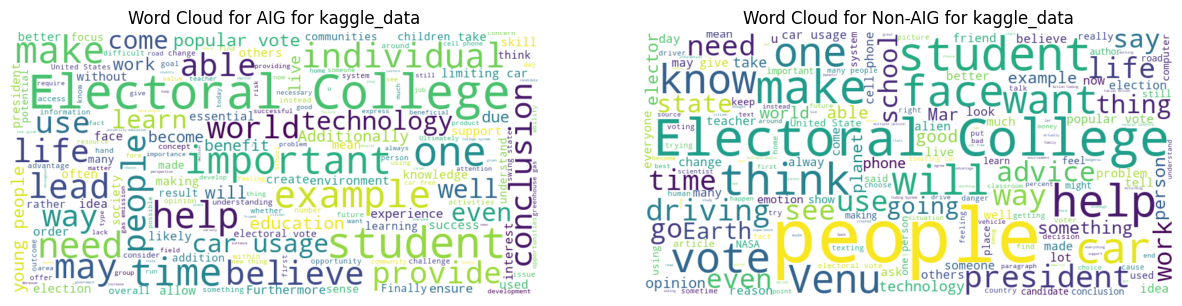

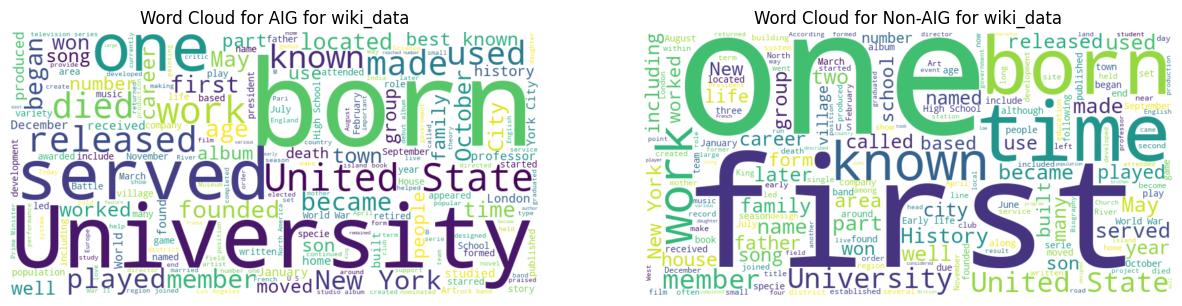

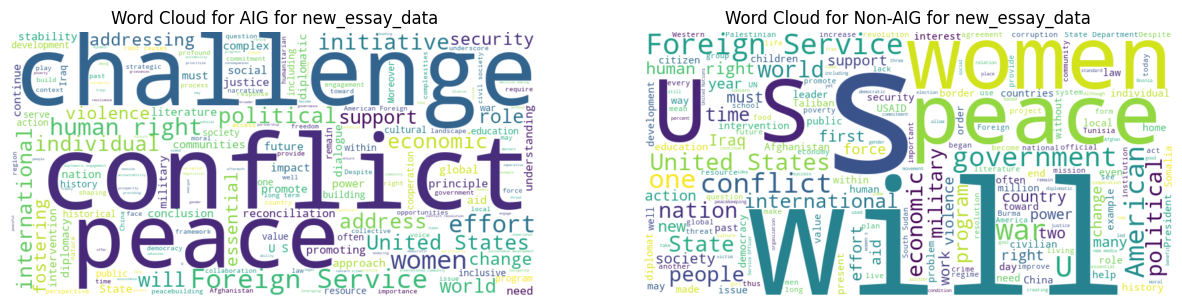

In [86]:
#study the word cloud pattern of AIG and non-AIG
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def word_cloud (df,df_name):
    text_aig = ' '.join(df[df['label'] == 1]['text'])
    text_non_aig = ' '.join(df[df['label'] == 0]['text'])
    # Generate word cloud for AIG
    wordcloud_aig = WordCloud(width=800, height=400, background_color='white').generate(text_aig)
    # Generate word cloud for non-AIG
    wordcloud_non_aig = WordCloud(width=800, height=400, background_color='white').generate(text_non_aig)
    # Display the generated word clouds
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_aig, interpolation='bilinear')
    plt.title(f'Word Cloud for AIG for {df_name}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_non_aig, interpolation='bilinear')
    plt.title(f'Word Cloud for Non-AIG for {df_name}')
    plt.axis('off')
    plt.show()
word_cloud(kaggle_eda, 'kaggle_data')
word_cloud(wiki_eda, 'wiki_data')
word_cloud(new_essay_eda, 'new_essay_data')

In [87]:
import nltk
from nltk.tokenize import word_tokenize

def find_determiners_pronouns_adverbs(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    determiners = ' '.join([word for word, pos in pos_tags if pos == 'DT'])
    pronouns = ' '.join([word for word, pos in pos_tags if pos == 'PRP' or pos == 'PRP$'])
    adverbs = ' '.join([word for word, pos in pos_tags if pos == 'RB'])
    return determiners, pronouns, adverbs

# Apply the function to each row of the DataFrame and assign the results to new columns
kaggle_eda[['determiners', 'pronouns', 'adverbs']] = kaggle_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)
wiki_eda[['determiners', 'pronouns', 'adverbs']] = wiki_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)
new_essay_eda[['determiners', 'pronouns', 'adverbs']] = new_essay_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)


In [88]:
len(wiki_eda['adverbs'].iloc[:1])

1

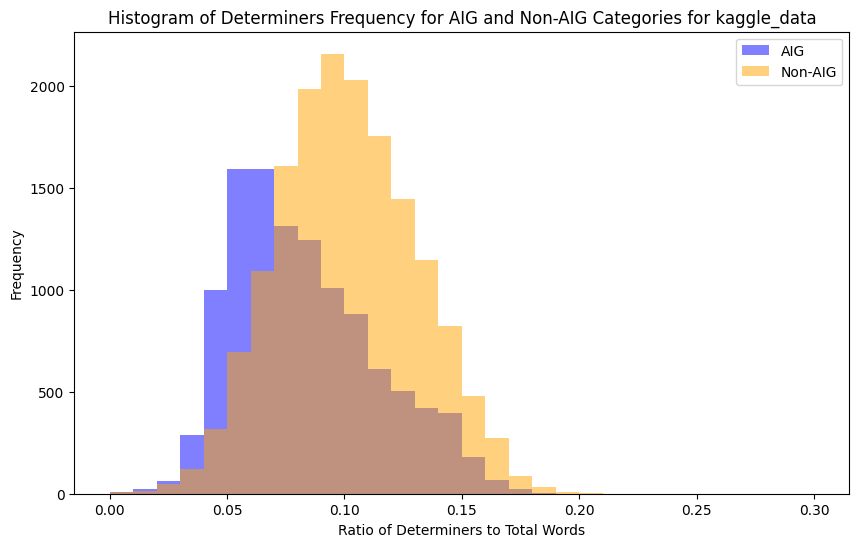

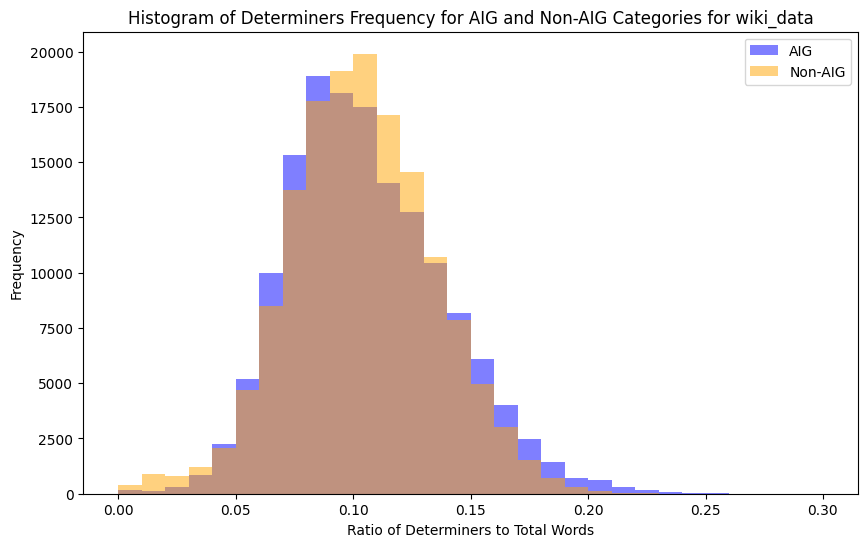

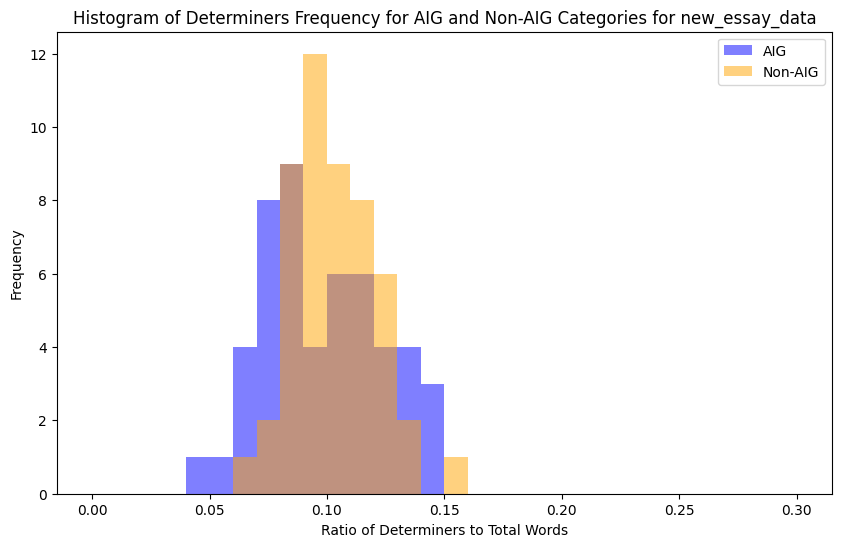

In [89]:
import matplotlib.pyplot as plt
def his_det_ratio(df, df_name):
    df['det_count'] = df['determiners'].apply(lambda x: len(x.split()))
    df['det_ratio']=df['det_count']/df['Word_Count']
    aig_det_ratio = df[df['label'] == 1]['det_ratio']
    non_aig_det_ratio = df[df['label'] == 0]['det_ratio']
    
    plt.figure(figsize=(10, 6))
    plt.hist(aig_det_ratio, bins=30, color='blue', range=(0,0.3), alpha=0.5, label='AIG', histtype='stepfilled')
    plt.hist(non_aig_det_ratio, bins=30, color='orange', range=(0,0.3),alpha=0.5, label='Non-AIG', histtype='stepfilled')
    
    plt.xlabel('Ratio of Determiners to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Determiners Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()

his_det_ratio(kaggle_eda, 'kaggle_data')
his_det_ratio(wiki_eda, 'wiki_data')
his_det_ratio(new_essay_eda, 'new_essay_data')


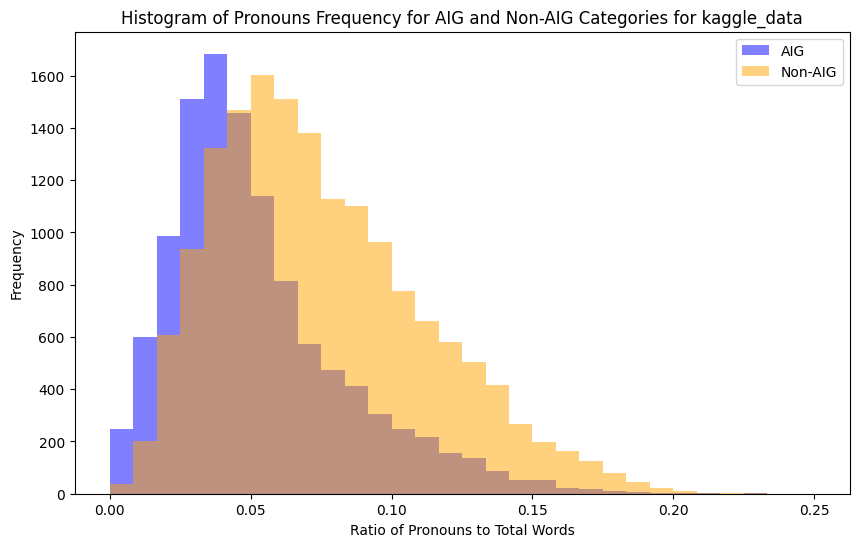

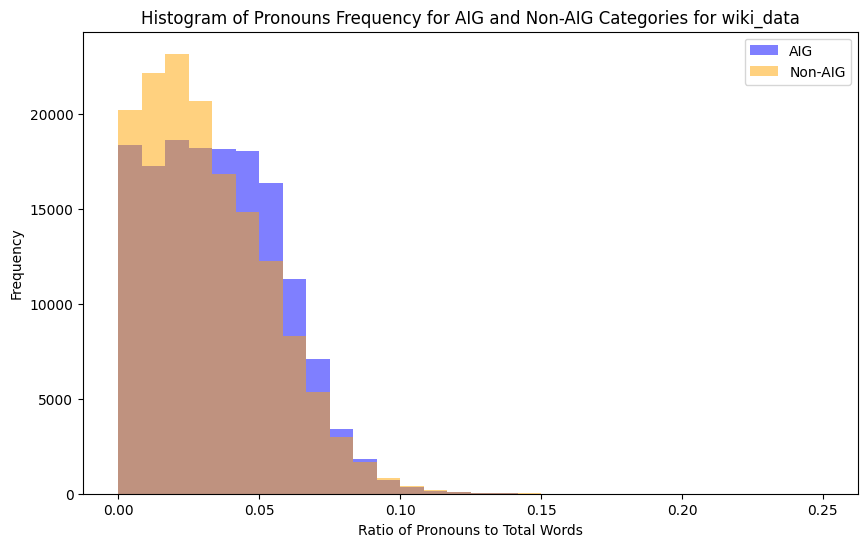

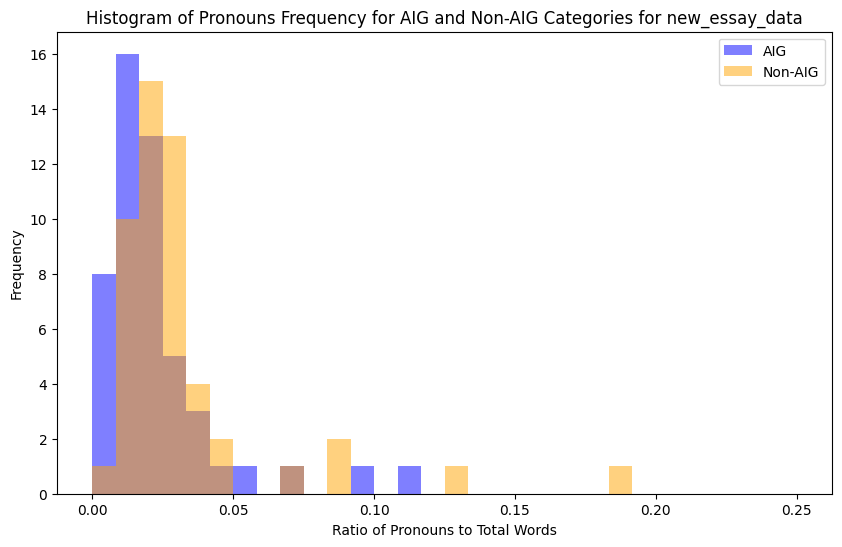

In [90]:
def his_pro_ratio(df, df_name):
    df['pro_count']=df['pronouns'].apply(lambda x: len(x.split()))
    df['pro_ratio']= df['pro_count']/df['Word_Count']
    aig_pro_ratio = df[df['label'] == 1]['pro_ratio']
    non_aig_pro_ratio = df[df['label'] == 0]['pro_ratio']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_pro_ratio, bins=30, range=(0,0.25),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_pro_ratio, bins=30, range=(0,0.25),color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Ratio of Pronouns to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pronouns Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_pro_ratio(kaggle_eda, 'kaggle_data')
his_pro_ratio(wiki_eda, 'wiki_data')
his_pro_ratio(new_essay_eda, 'new_essay_data')

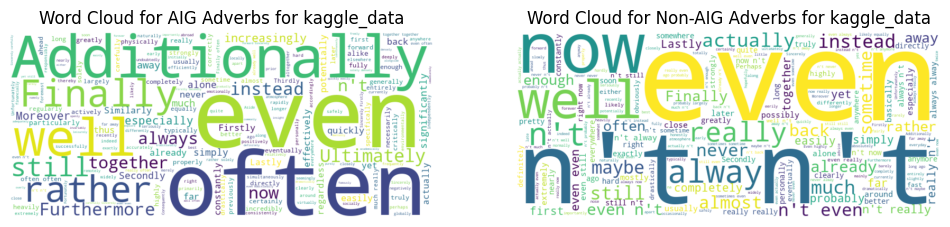

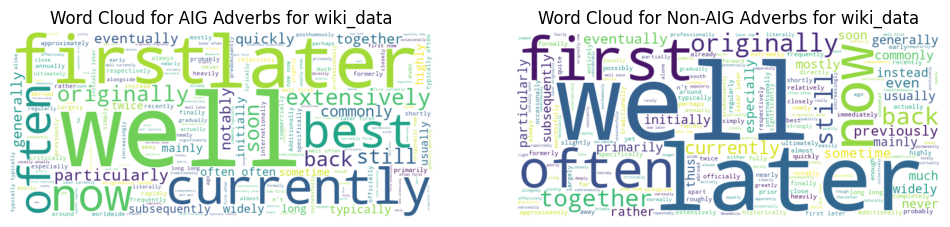

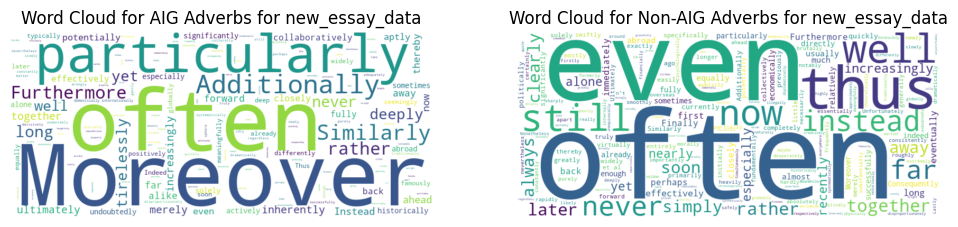

In [91]:
def word_cloud (df,df_name):
    text_aig = ' '.join(df[df['label'] == 1]['adverbs'])
    text_non_aig = ' '.join(df[df['label'] == 0]['adverbs'])
    # Generate word cloud for AIG
    wordcloud_aig = WordCloud(width=800, height=350, background_color='white').generate(text_aig)
    # Generate word cloud for non-AIG
    wordcloud_non_aig = WordCloud(width=800, height=350, background_color='white').generate(text_non_aig)
    # Display the generated word clouds
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_aig, interpolation='bilinear')
    plt.title(f'Word Cloud for AIG Adverbs for {df_name}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_non_aig, interpolation='bilinear')
    plt.title(f'Word Cloud for Non-AIG Adverbs for {df_name}')
    plt.axis('off')
    plt.show()
word_cloud(kaggle_eda, 'kaggle_data')
word_cloud(wiki_eda, 'wiki_data')
word_cloud(new_essay_eda, 'new_essay_data')

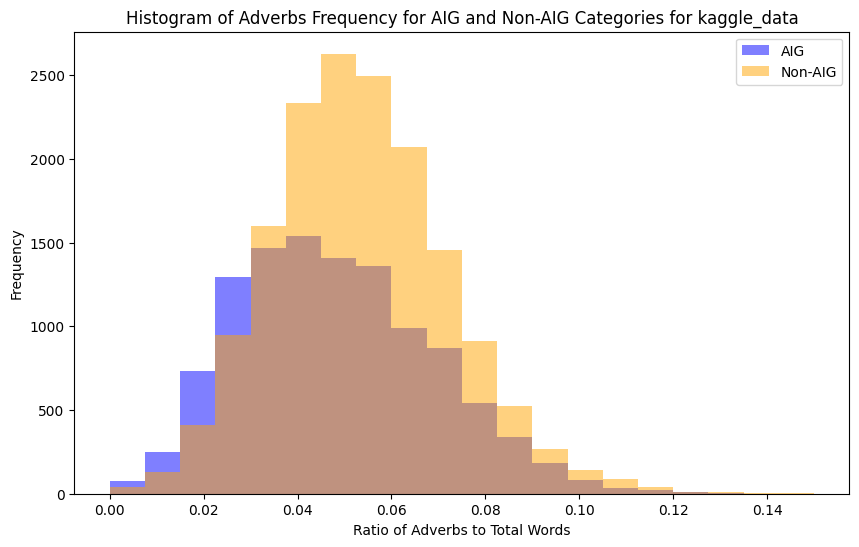

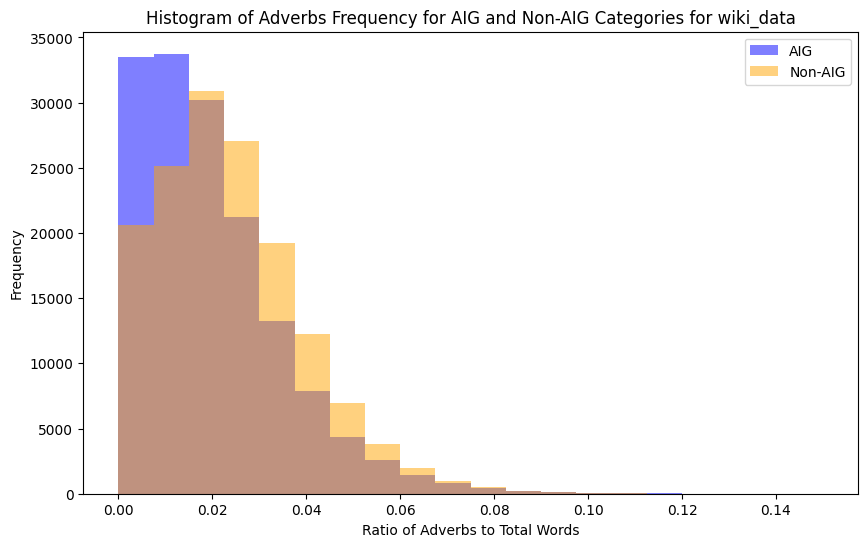

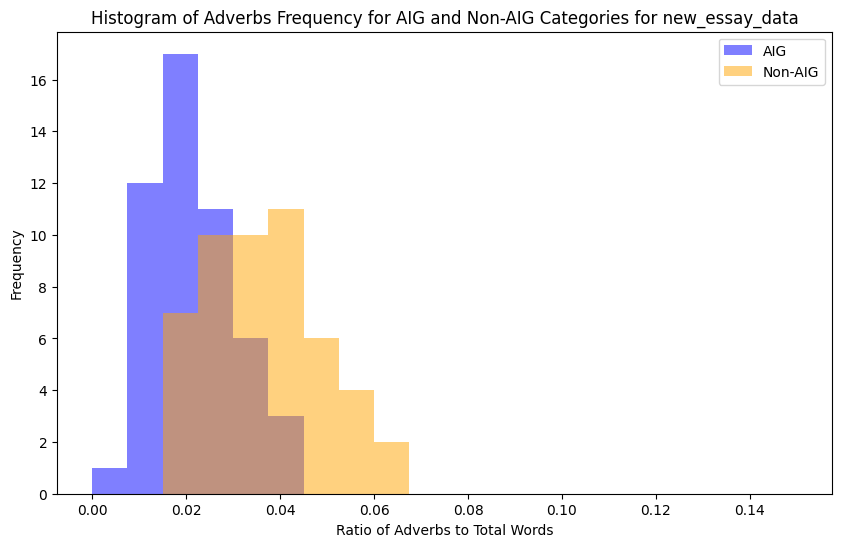

In [92]:
def his_ad_ratio(df, df_name):
    df['ad_count']=df['adverbs'].apply(lambda x: len(x.split()))
    df['ad_ratio']= df['ad_count']/df['Word_Count']
    aig_pro_ratio = df[df['label'] == 1]['ad_ratio']
    non_aig_pro_ratio = df[df['label'] == 0]['ad_ratio']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_pro_ratio, bins=20, range=(0,0.15), color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_pro_ratio, bins=20, range=(0,0.15), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Ratio of Adverbs to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Adverbs Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_ad_ratio(kaggle_eda, 'kaggle_data')
his_ad_ratio(wiki_eda, 'wiki_data')
his_ad_ratio(new_essay_eda, 'new_essay_data')

In [93]:
import nltk
from nltk.tokenize import word_tokenize

def find_nouns_verbs_adjectives(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    nouns = ' '.join([word for word, pos in pos_tags if pos.startswith('NN')])
    verbs = ' '.join([word for word, pos in pos_tags if pos.startswith('VB')])
    adjectives = ' '.join([word for word, pos in pos_tags if pos.startswith('JJ')])
    return nouns, verbs, adjectives

# Apply the function to each row of the DataFrame and assign the results to new columns
kaggle_eda[['nouns', 'verbs', 'adjectives']] = kaggle_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)
wiki_eda[['nouns', 'verbs', 'adjectives']] = wiki_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)
new_essay_eda[['nouns', 'verbs', 'adjectives']] = new_essay_eda['text'].apply(find_determiners_pronouns_adverbs).apply(pd.Series)

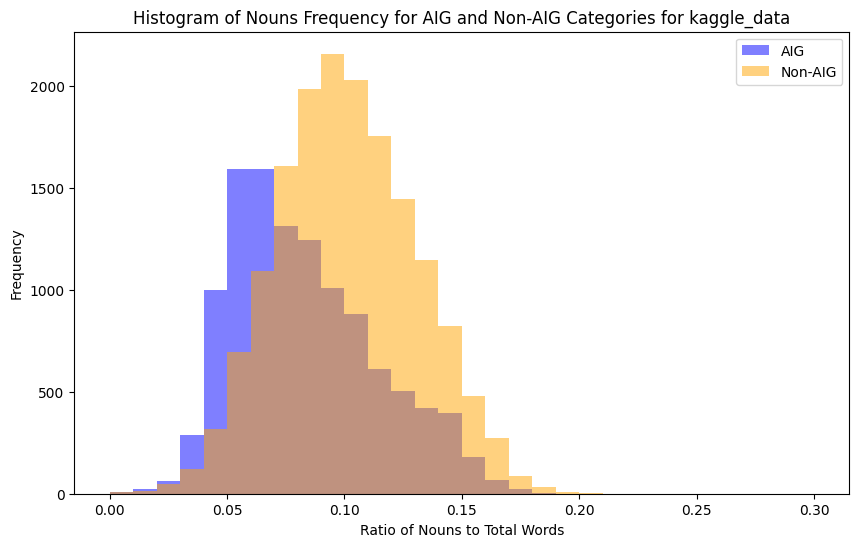

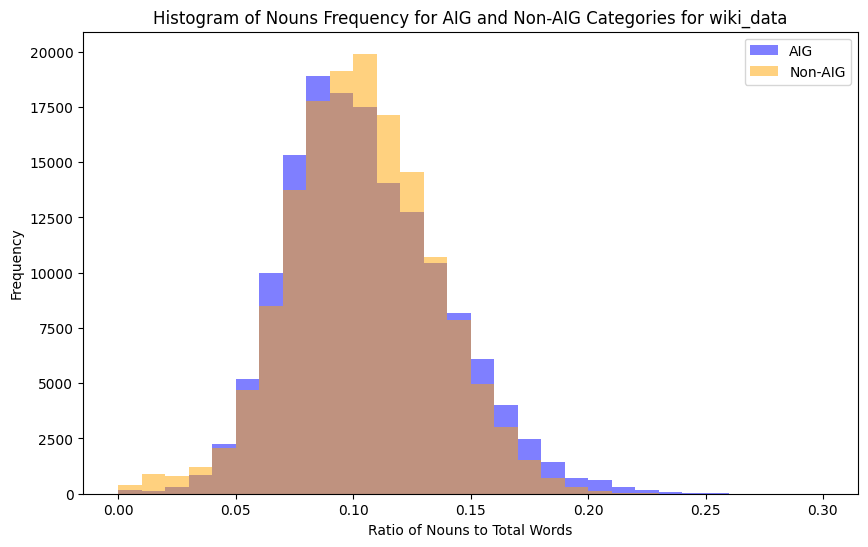

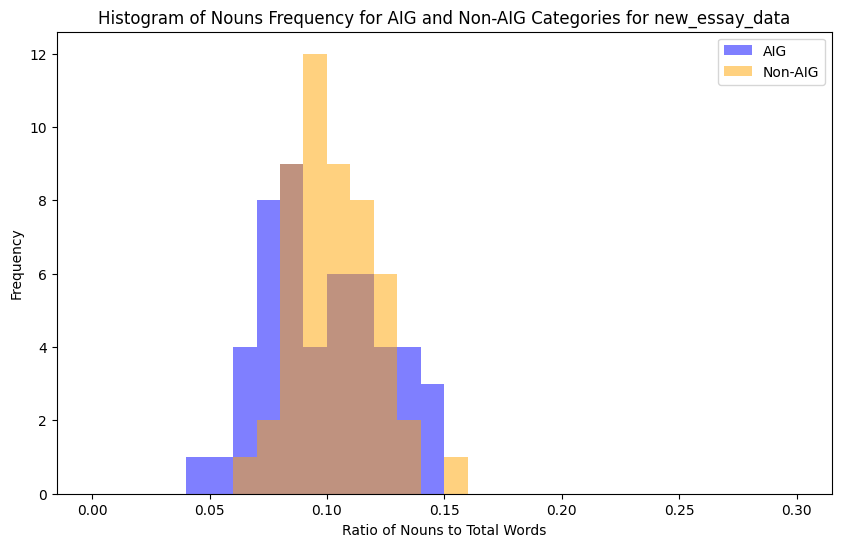

In [94]:
def his_noun_ratio(df, df_name):
    df['nouns_count']=df['nouns'].apply(lambda x: len(x.split()))
    df['nouns_ratio']= df['nouns_count']/df['Word_Count']
    aig_pro_ratio = df[df['label'] == 1]['nouns_ratio']
    non_aig_pro_ratio = df[df['label'] == 0]['nouns_ratio']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_pro_ratio, bins=30, range=(0,0.3), color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_pro_ratio, bins=30,range=(0,0.3), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Ratio of Nouns to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Nouns Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_noun_ratio(kaggle_eda, 'kaggle_data')
his_noun_ratio(wiki_eda, 'wiki_data')
his_noun_ratio(new_essay_eda, 'new_essay_data')

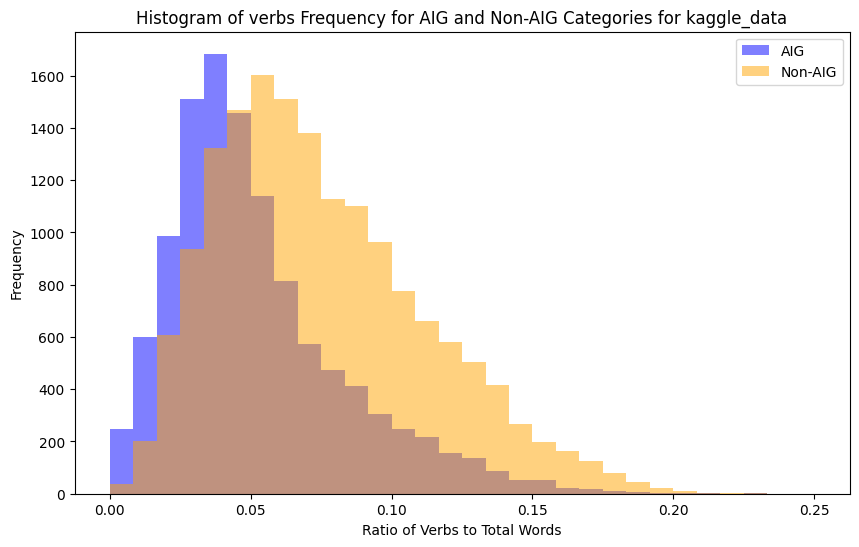

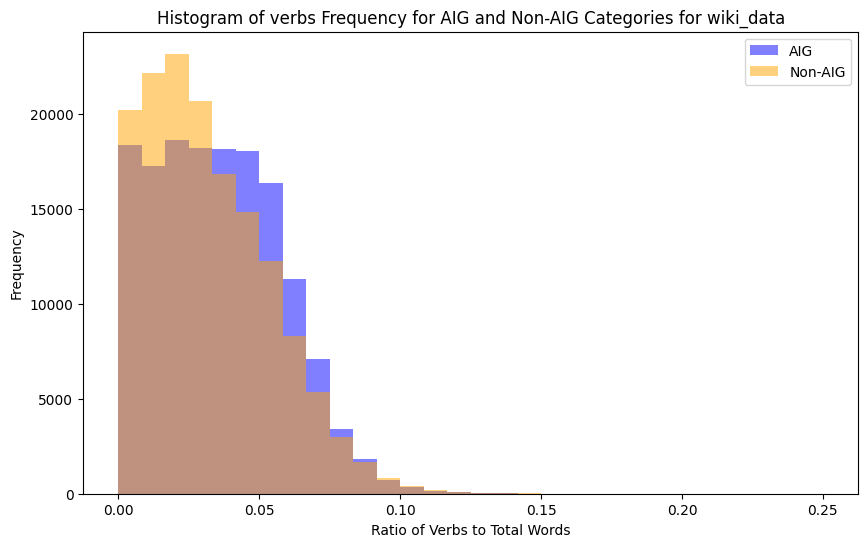

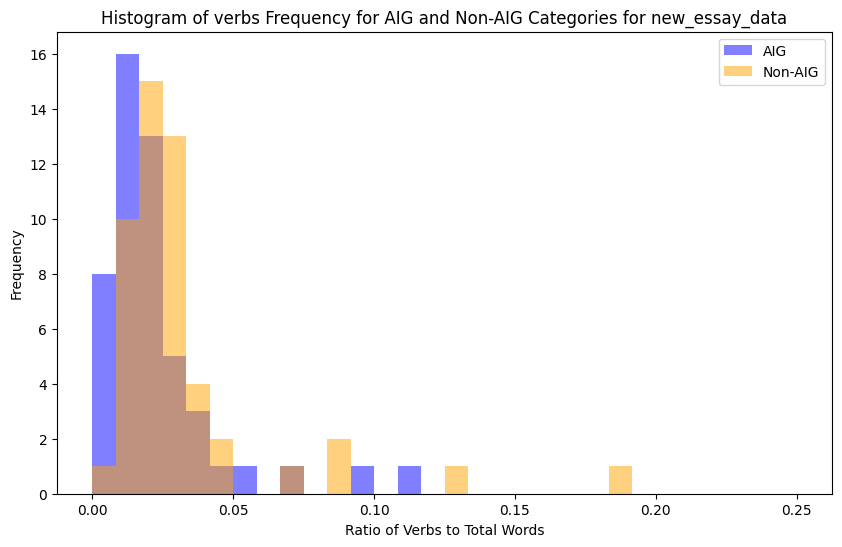

In [95]:
def his_verb_ratio(df, df_name):
    df['verbs_count']=df['verbs'].apply(lambda x: len(x.split()))
    df['verbs_ratio']= df['verbs_count']/df['Word_Count']
    aig_pro_ratio = df[df['label'] == 1]['verbs_ratio']
    non_aig_pro_ratio = df[df['label'] == 0]['verbs_ratio']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_pro_ratio, bins=30, range=(0,0.25),color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_pro_ratio, bins=30, range=(0,0.25), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Ratio of Verbs to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of verbs Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_verb_ratio(kaggle_eda, 'kaggle_data')
his_verb_ratio(wiki_eda, 'wiki_data')
his_verb_ratio(new_essay_eda, 'new_essay_data')

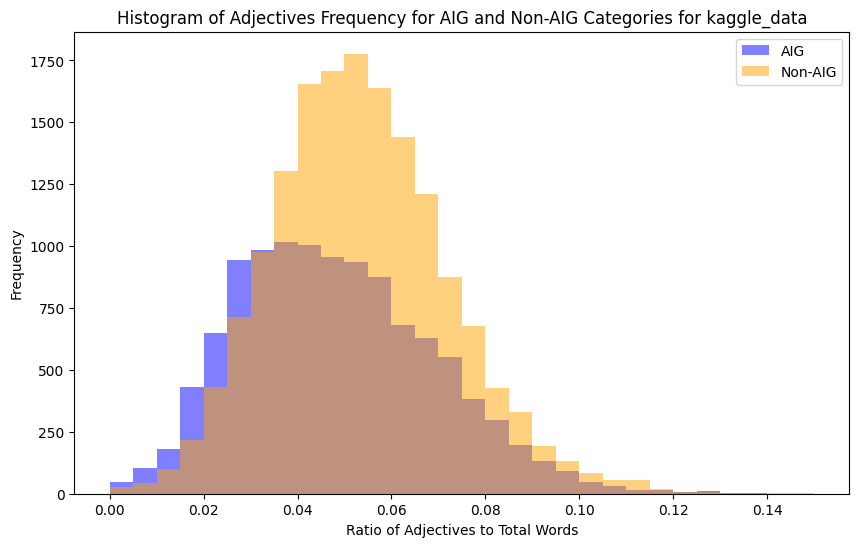

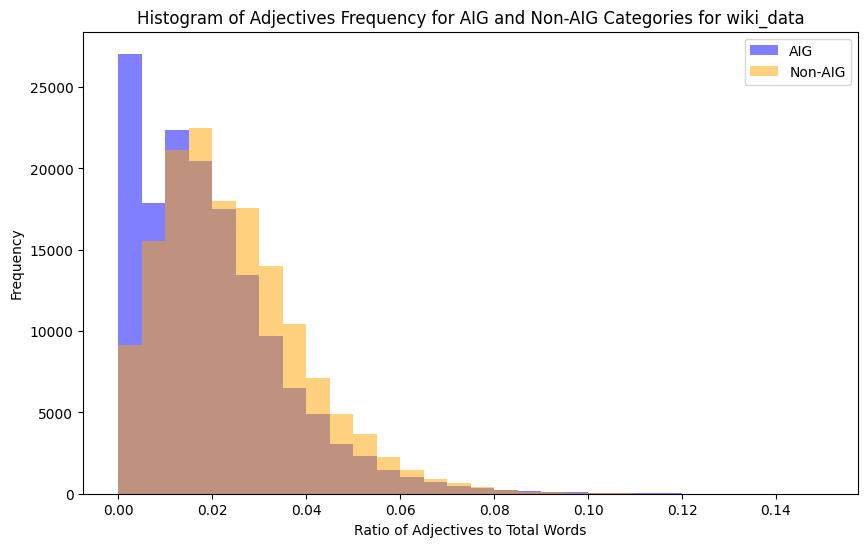

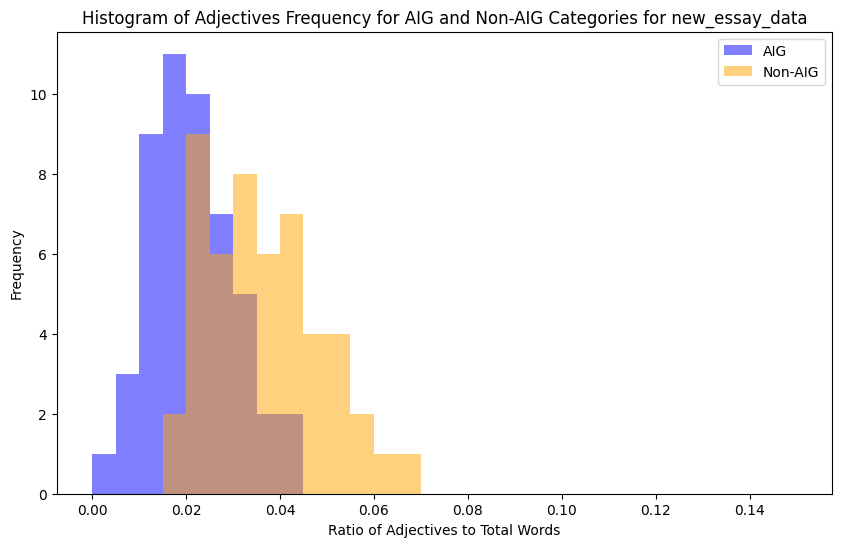

In [96]:
def his_adj_ratio(df, df_name):
    df['adj_count']=df['adjectives'].apply(lambda x: len(x.split()))
    df['adj_ratio']= df['adj_count']/df['Word_Count']
    aig_pro_ratio = df[df['label'] == 1]['adj_ratio']
    non_aig_pro_ratio = df[df['label'] == 0]['adj_ratio']
    plt.figure(figsize=(10, 6))
    plt.hist(aig_pro_ratio, bins=30, range=(0,0.15), color='blue', alpha=0.5, label='AIG')
    plt.hist(non_aig_pro_ratio, bins=30, range=(0,0.15), color='orange', alpha=0.5, label='Non-AIG')
    plt.xlabel('Ratio of Adjectives to Total Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Adjectives Frequency for AIG and Non-AIG Categories for {df_name}')
    plt.legend()
    plt.show()
his_adj_ratio(kaggle_eda, 'kaggle_data')
his_adj_ratio(wiki_eda, 'wiki_data')
his_adj_ratio(new_essay_eda, 'new_essay_data')